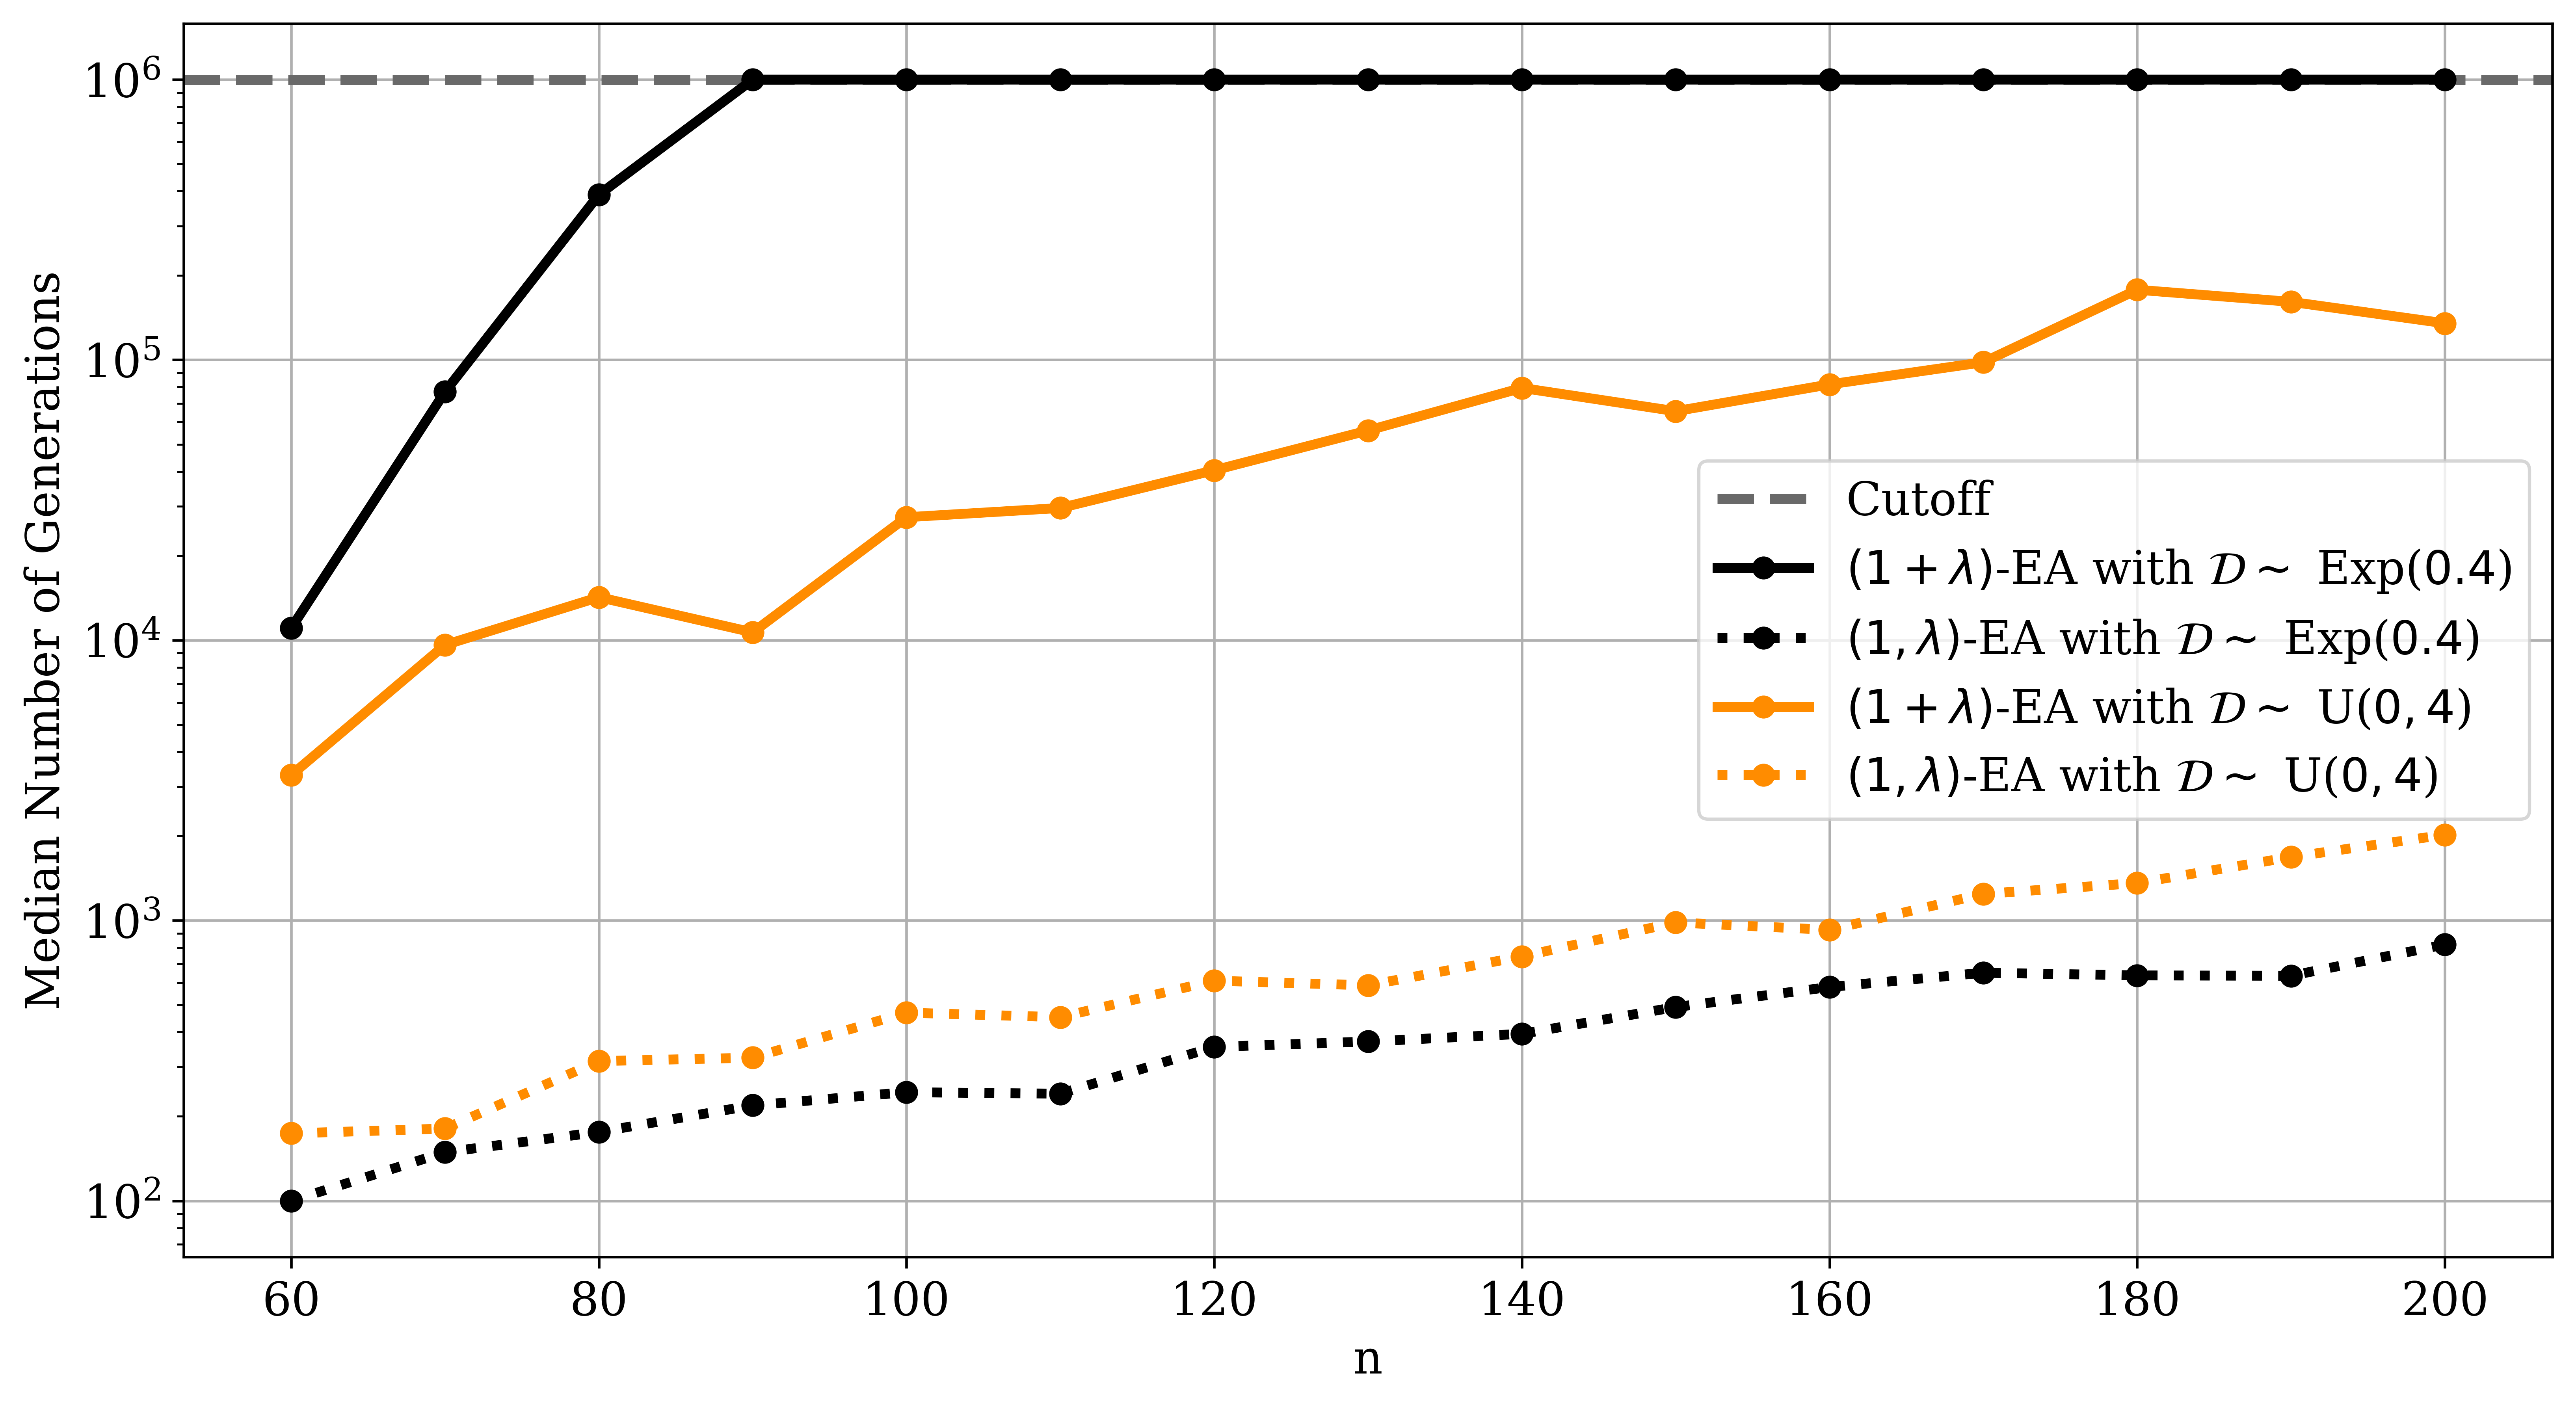

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots 

plt.style.use(['ieee'])
matplotlib.rcParams.update({"font.family": "serif","font.serif": ["DejaVu Serif"]})
plt.figure(figsize=(11, 6))
plt.rcParams['font.size'] = '14'
linew = 3
plt.grid()
plt.tight_layout()

n_values = np.linspace(60, 200, 15).astype(int)

with open('lnn15fixed_simulate_exp04_iter=49_from=60_to=200_steps=10_cutoff=1000000.txt', 'r') as file:
    data = file.readlines()
exp_plusData = np.array([data[1+4*i].split()[1:] for i in (range(len(n_values)))]).astype(int)
exp_commaData = np.array([data[2+4*i].split()[1:] for i in (range(len(n_values)))]).astype(int)

with open('lnn15fixed_simulate_unif4_iter=49_from=60_to=200_steps=10_cutoff=1000000.txt', 'r') as file:
    data = file.readlines()
unif_plusData = np.array([data[1+4*i].split()[1:] for i in (range(len(n_values)))]).astype(int)
unif_commaData = np.array([data[2+4*i].split()[1:] for i in (range(len(n_values)))]).astype(int)


plt.axhline(y=1000000, linestyle='--', label='Cutoff', linewidth=linew, color='dimgrey')
plt.plot(n_values, np.median(exp_plusData, axis=1), label='$(1 + \lambda)$-EA with $\mathcal{D} \sim$ Exp($0.4$)', marker='o', linewidth=linew, linestyle='-', color='black')
plt.plot(n_values, np.median(exp_commaData, axis=1), label='$(1 , \lambda)$-EA with $\mathcal{D} \sim$ Exp($0.4$)', marker='o', linewidth=linew, linestyle=':', color='black')
plt.plot(n_values, np.median(unif_plusData, axis=1), label='$(1 + \lambda)$-EA with $\mathcal{D} \sim$ U($0, 4$)', marker='o', linewidth=linew, linestyle='-', color='darkorange')
plt.plot(n_values, np.median(unif_commaData, axis=1), label='$(1 , \lambda)$-EA with $\mathcal{D} \sim$ U($0, 4$)', marker='o', linewidth=linew, linestyle=':', color='darkorange')


plt.xlabel('n')
plt.ylabel('Median Number of Generations')
plt.yscale('log')
plt.legend()
plt.savefig('MedianSimulations_expUniDistortions.pdf', format='pdf')
plt.show()